In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from empiricaldist import Pmf
from scipy.stats import binom

def decorate(**options):
    """Decorate the current axes.
    Call decorate with keyword arguments like
    decorate(title='Title',
             xlabel='x',
             ylabel='y')
    The keyword arguments can be any of the axis properties
    https://matplotlib.org/api/axes_api.html
    """
    ax = plt.gca()
    ax.set(**options)

    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, labels)

    plt.tight_layout()

### Exercise 1:

Exercise: Let’s use Bayes’s Rule to solve the Elvis problem from <<_Distributions>>:

Elvis Presley had a twin brother who died at birth. What is the probability that Elvis was an identical twin?

In 1935, about 2/3 of twins were fraternal and 1/3 were identical. The question contains two pieces of information we can use to update this prior.

- First, Elvis’s twin was also male, which is more likely if they were identical twins, with a likelihood ratio of 2.

- Also, Elvis’s twin died at birth, which is more likely if they were identical twins, with a likelihood ratio of 1.25.

In [3]:
def odds(p):
    return p / (1-p)

# odds Elvis was identical twin 
prior_odds = odds(1/3)

# our likelihood ratio is just 2 * 1.25
post_odds = prior_odds * 2 * 1.25

# convert to prob
post_odds / (post_odds + 1)

0.5555555555555555

### Exercise 2:

`You’re about to get on a plane to Seattle. You want to know if you should bring an umbrella. You call 3 random friends of yours who live there and ask each independently if it’s raining. Each of your friends has a 2/3 chance of telling you the truth and a 1/3 chance of messing with you by lying. All 3 friends tell you that “Yes” it is raining. What is the probability that it’s actually raining in Seattle?`

Use Bayes’s Rule to solve this problem. As a prior you can assume that it rains in Seattle about 10% of the time.

This question causes some confusion about the differences between Bayesian and frequentist interpretations of probability; if you are curious about this point, I wrote a blog article about it.

#### Solution as Bayes Factor:

```python
odds(Raining|All 3 Friends say Rain) = 

odds(Raining) * P(Friend 1 Rain | Rain) / P(Friend 1 Rain | False)
              * P(Friend 2 Rain | Rain) / P(Friend 2 Rain | False)
              * P(Friend 3 Rain | Rain) / P(Friend 3 Rain | False)
        
```

In [26]:
# we can convert to odds
prior_odds = odds(0.1)
print(prior_odds)

# this one messed me up, but I see where he is coming from:
# we find a single friend's likelihood ratio of true to false, which is 2-1
friend_true_likelihood_ratio = odds(2/3)
print(friend_likelihood_ratio)

# multiply prior odds by
post_odds = prior_odds * (friend_likelihood_ratio**3)
post_odds / (post_odds + 1)

0.11111111111111112
1.9999999999999998


0.4705882352941176

In [30]:
# bayes rule approach: it is raining

# raining 
prior = 0.1

# likelihood => all 3 friends telling truth
likelihood = (2/3) ** 3

unnormed = prior * likelihood

# not raining 
prior = 0.9

# likelihood => all 3 friends lie 
likelihood = (1/3) ** 3

unnormed2 = prior * likelihood

# norming factor
norming_factor = unnormed + unnormed2

# solve
print(f"Likelihood rain: {unnormed / norming_factor}")
print(f"Likelihood no rain: {unnormed2 / norming_factor}")

Likelihood rain: 0.4705882352941177
Likelihood no rain: 0.5294117647058824


In [14]:
# frequentist approach: 
# I know there are 2^3 combinations, and only 2 are possible (TTT, LLL) when rain
# when not rain and all say yes, we see (0.9 * 1/3^3)
truth = (0.1 * )

0.44444444444444453

In [32]:
0.9 * (1/3**3) # no rain, all say yes rain

0.03333333333333333

In [33]:
0.1 * (2/3**3) # rain, all say yes rain

0.007407407407407408

### Exercise:

According to the CDC, people who smoke are about 25 times more likely to develop lung cancer than nonsmokers.

Also according to the CDC, about 14% of adults in the U.S. are smokers. If you learn that someone has lung cancer, what is the probability they are a smoker?

In [35]:
prior_odds = odds(0.14)
likelihood = 25
posterior_odds = prior_odds * likelihood
posterior_odds = posterior_odds / (posterior_odds + 1)
posterior_odds 

0.8027522935779816

### Exercise:

Exercise: In Dungeons & Dragons, the amount of damage a goblin can withstand is the sum of two six-sided dice. The amount of damage you inflict with a short sword is determined by rolling one six-sided die. A goblin is defeated if the total damage you inflict is greater than or equal to the amount it can withstand.

Suppose you are fighting a goblin and you have already inflicted 3 points of damage. What is your probability of defeating the goblin with your next successful attack?

Hint: You can use Pmf.sub_dist to subtract a constant amount, like 3, from a Pmf.


In [65]:
import numpy as np
from empiricaldist import Pmf

def decorate_dice(title=''):
    decorate(xlabel='Outcome',
             ylabel='PMF',
             title=title)

def make_die(sides):
    outcomes = np.arange(1, sides+1)
    die = Pmf(1/sides, outcomes)
    return die

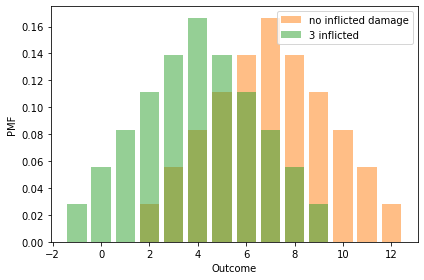

In [66]:
# estimate damage withstood
die = make_die(6)
goblin_armor = Pmf.add_dist(die, die)
goblin_armor.bar(color='C1', alpha=0.5, label = 'no inflicted damage')
decorate_dice();

# remove 3 from distribution ()
goblin_inflicted = goblin_armor.sub_dist(3)
goblin_inflicted.bar(color='C2', alpha=0.5, label = '3 inflicted')
decorate_dice();


0.5


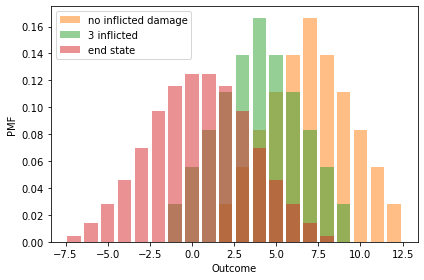

In [67]:
# damage inflicted
damage_given = Pmf(die)

# and maybe we just remove it from goblin inflicted?
end_state = goblin_inflicted.sub_dist(damage_given)

# remove 3 from distribution ()
goblin_armor.bar(color='C1', alpha=0.5, label = 'no inflicted damage')
goblin_inflicted.bar(color='C2', alpha=0.5, label = '3 inflicted')
end_state.bar(color='C3', alpha=0.5, label = 'end state')
decorate_dice();

# we now want to determine percentage at or below 0:
print(f"{end_state.prob_le(0)}") # 50%

#### What I Omitted:

- Author throws a step in where a 0 / -1 HP is not possible, so those are zeroed out and renormalized.
- Initially I disagreed because I thought "well, the goblin died during my turn - doesn't that count towards my probability?"
- However, the question clearly states `What is your probability of defeating the goblin with your next successful attack?`, which has to be interpreted as "the goblin is still stnading after the 3 points of damage but prior to your next attack. Given this, what is the likelihood of defeating the goblin?"

I like this problem!

0.4545454545454545


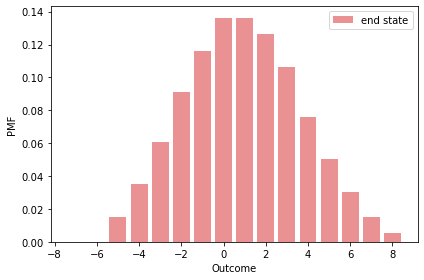

In [68]:
# damage inflicted
damage_given = Pmf(die)

# We need to handle dead goblins before our attack
goblin_inflicted[[-1, 0]] = 0
goblin_inflicted.normalize()
end_state = goblin_inflicted.sub_dist(damage_given)

end_state.bar(color='C3', alpha=0.5, label = 'end state')
decorate_dice();

# we now want to determine percentage at or below 0:
print(f"{end_state.prob_le(0)}") # 50%